In [59]:
from ast import literal_eval
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_score,f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Dataset.xlsx')
data.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


# Data Cleaning

In [3]:
# check for null values
data.isnull().sum()

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [4]:
# check for duplicate values
data.duplicated().any()

False

# Exploratory Data Analysis

### Categorical Data distribution

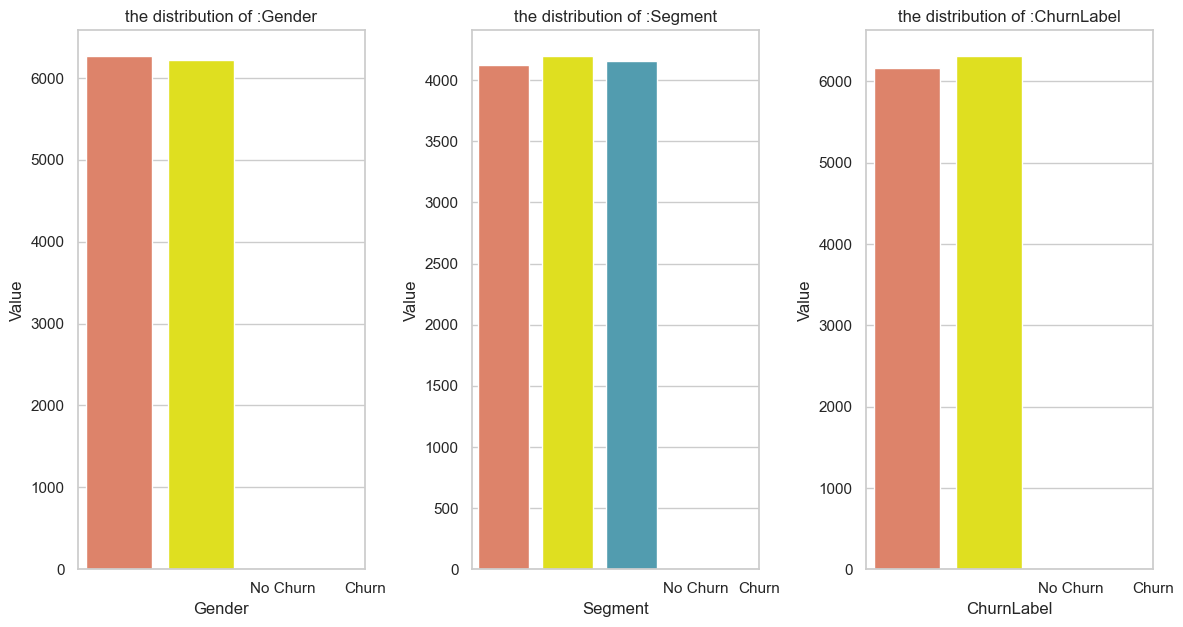

In [5]:
# Categorical data
sns.set(style='whitegrid')
color_palette=['#F07857','#FFFF00','#43A5BE']
plt.figure(figsize=(12,12))
category = ['Gender','Segment','ChurnLabel']
for i, cat in enumerate(category):
    plt.subplot(2,3,i+1)
    sns.countplot(data,x=cat,palette=color_palette)
    plt.title(f'the distribution of :{cat}')
    plt.xlabel(cat)
    plt.ylabel('Value')
    plt.xticks(['No Churn','Churn'])
plt.tight_layout()
plt.show()

### numerical Data Distribution

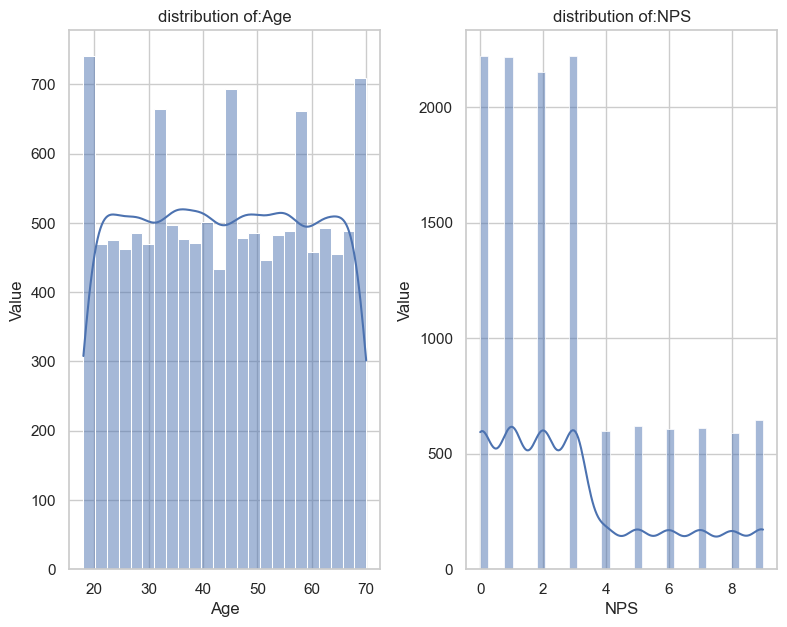

In [6]:
category = ['Age','NPS']
plt.figure(figsize=(12,12))
for index,name in enumerate(category):
    plt.subplot(2,3,index+1)
    sns.histplot(data,x=name,kde=True)
    plt.title(f'distribution of:{name}')
    plt.xlabel(name)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

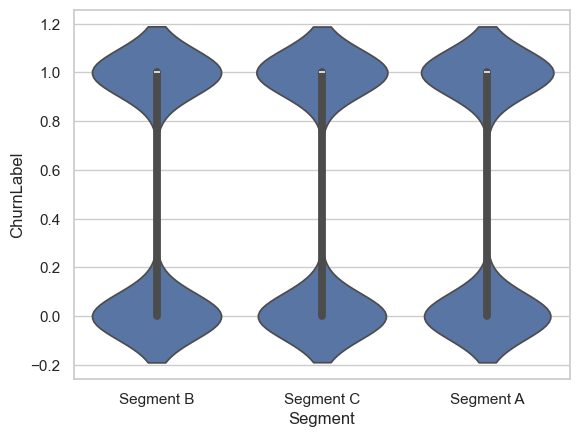

In [7]:
sns.violinplot(data,x='Segment',y='ChurnLabel')
plt.show()

correlation between the target variable and the numerical variables

In [8]:
features = ['Age','NPS','ChurnLabel']

corre = data[features].corr()
corre

,Age,NPS,ChurnLabel
Age,1.000000,0.000006,0.010273
NPS,0.000006,1.000000,-0.540703
ChurnLabel,0.010273,-0.540703,1.000000


<Axes: >

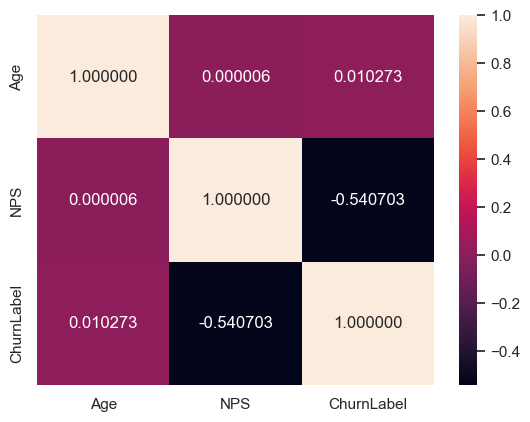

In [9]:
sns.heatmap(corre, annot=True,fmt='f')

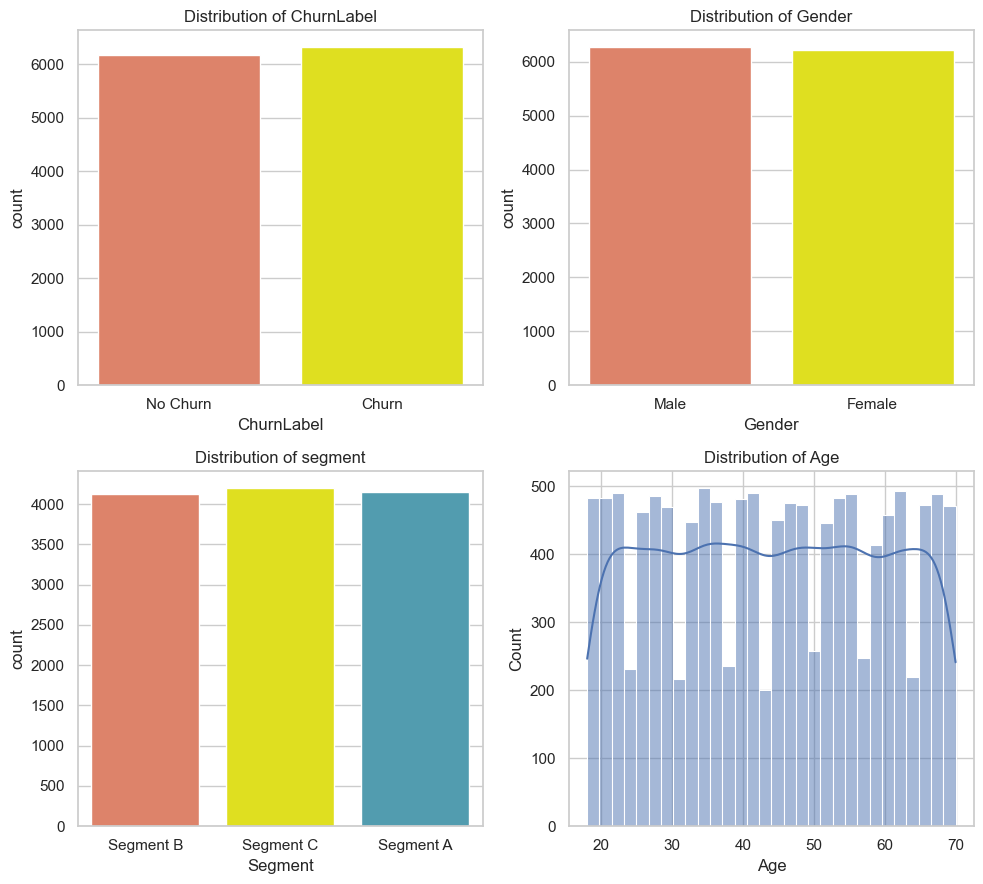

In [10]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,9))
sns.countplot(data,x='ChurnLabel',ax=ax[0,0],palette=color_palette)
ax[0,0].set_title("Distribution of ChurnLabel")
ax[0,0].set_xticklabels(['No Churn','Churn'])

sns.countplot(data,x='Gender',ax=ax[0,1],palette=color_palette)
ax[0,1].set_title('Distribution of Gender')

sns.countplot(data,x='Segment',ax=ax[1,0],palette=color_palette)
ax[1,0].set_title('Distribution of segment')

sns.histplot(data,x='Age',bins=30,kde=True,ax=ax[1,1])
ax[1,1].set_title('Distribution of Age')

plt.tight_layout()
plt.show()

In [11]:
# calculate correlation with churnlabel

correlation = data.select_dtypes(include = np.number).corr()['ChurnLabel'].sort_values(ascending=False)
correlation

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

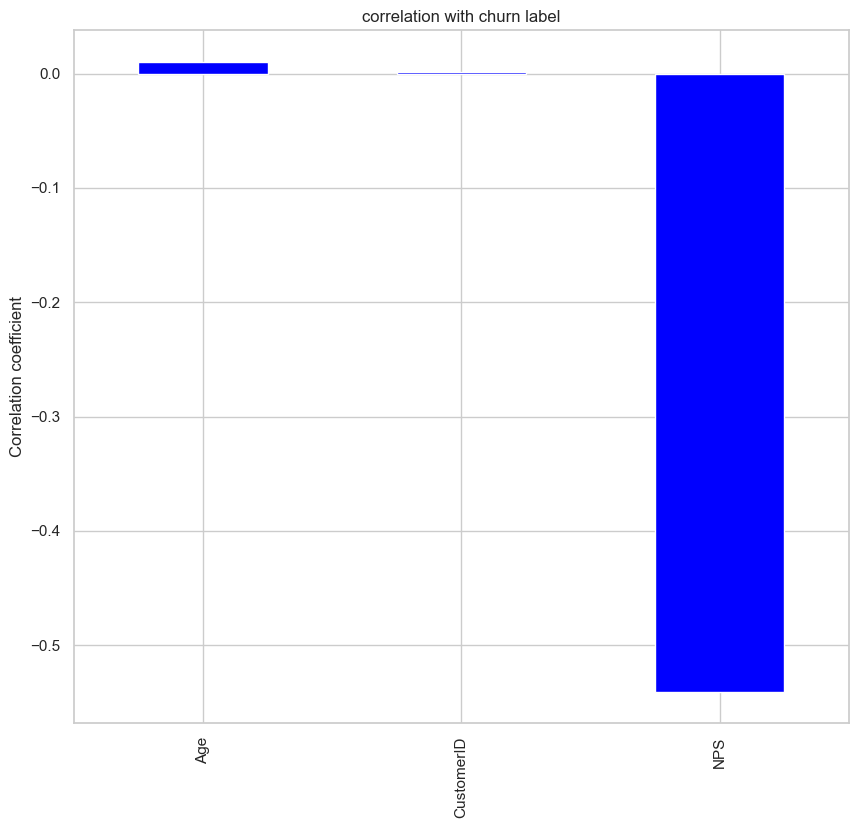

In [12]:
# plot the churn label
plt.figure(figsize=(10,9))
correlation.drop('ChurnLabel').plot(kind='bar',color='blue')
plt.title("correlation with churn label")
plt.ylabel('Correlation coefficient')
plt.show()


In [13]:
# list out all the nested column

nested_columns=['PurchaseHistory',
               'SubscriptionDetails',
               'ServiceInteractions',
               'PaymentHistory',
               'WebsiteUsage',
               'ClickstreamData',
               'EngagementMetrics',
               'Feedback',
               'MarketingCommunication']

w1,w2 = 25,1000

for col in nested_columns:
    row=[col, data[col][0]]
    print('\n| {:<{w1}} | {:<{w2}} |'.format(*row,w1=w1,w2=w2))


| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [14]:
# Temporal Analysis: we take a look at how the churn rate changes over time see if there is any recurring pattern

# convert the timestamp to datatime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

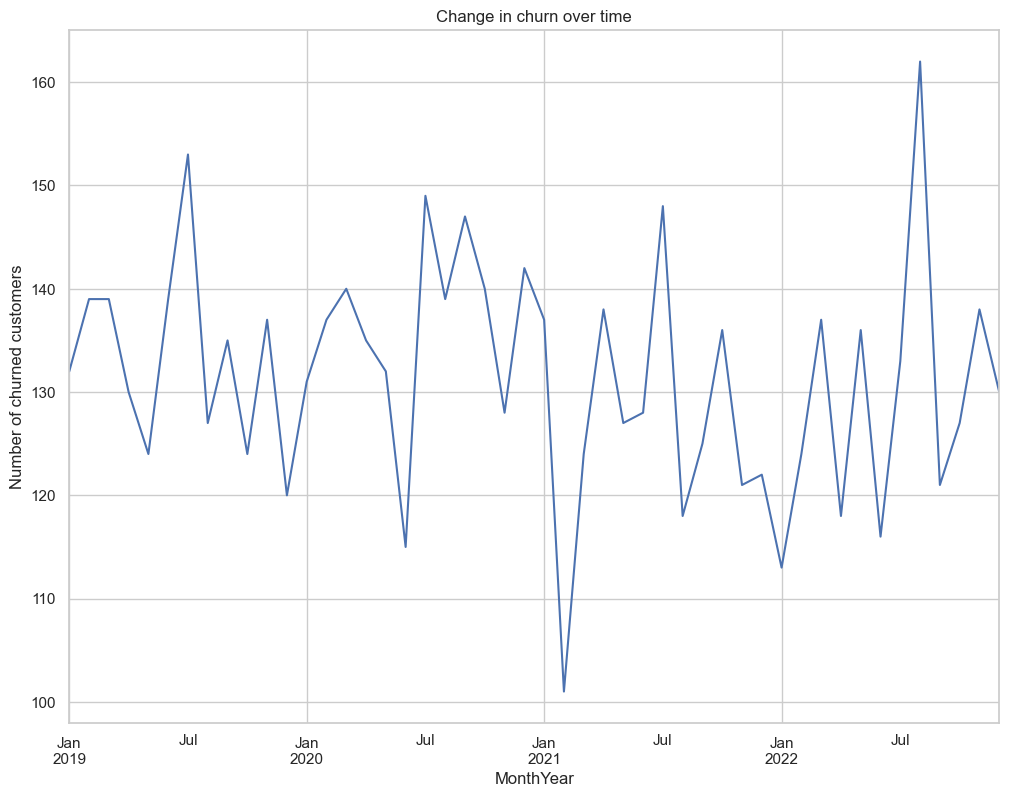

In [15]:
# extract the monthyear

data['MonthYear'] = data['Timestamp'].dt.to_period('M')

month_churn_rate = data.groupby('MonthYear')['ChurnLabel'].sum()

plt.figure(figsize=(12,9))
month_churn_rate.plot()
plt.title('Change in churn over time')
plt.xlabel('MonthYear')
plt.ylabel('Number of churned customers')
plt.show()

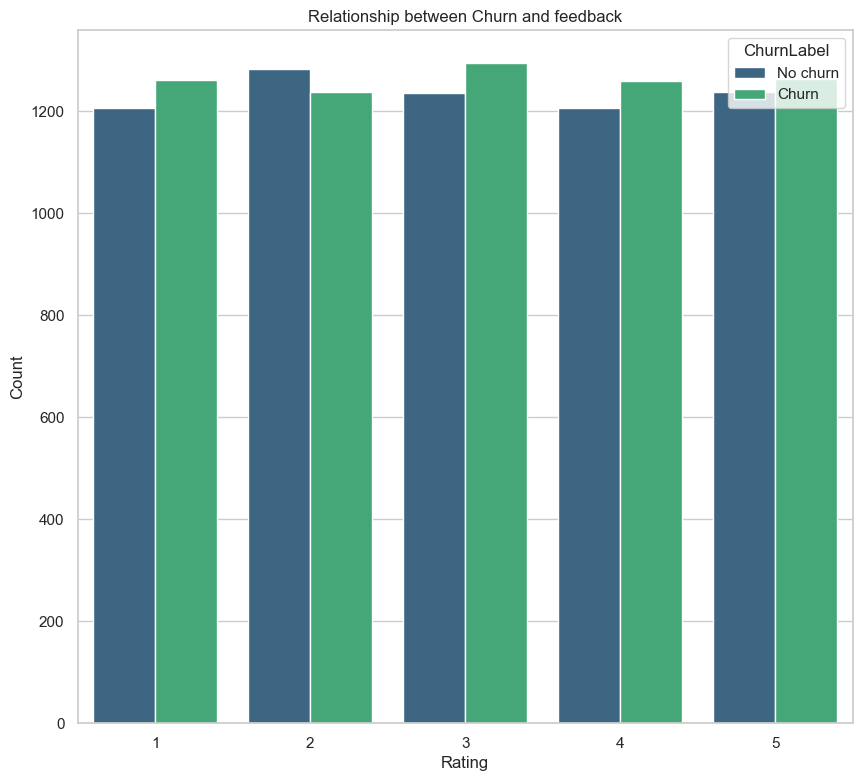

In [16]:
# Extracting rating from the feedback column and creating a new column

data['FeedbackRating']=data['Feedback'].apply(lambda x: eval(x)['Rating'])

# plotting relationship between churn and feedback

plt.figure(figsize=(10,9))

sns.countplot(data,x='FeedbackRating',hue='ChurnLabel',palette='viridis')
plt.title('Relationship between Churn and feedback')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel',loc='upper right',labels=['No churn','Churn'])
plt.show()

from the visual there is no indixcation that the feed back affects the churnlabel

# Data Engineering and preprocessing
what we will do:
1. create more features that may have predictive power
2. convert categorical variable into numerical variables
3. scale or normalize categorical variable 
4. split the data into train and test set
5. remove irrelevant features


In [17]:
nested_columns=['PurchaseHistory',
               'SubscriptionDetails',
               'ServiceInteractions',
               'PaymentHistory',
               'WebsiteUsage',
               'ClickstreamData',
               'EngagementMetrics',
               'Feedback',
               'MarketingCommunication']
# apply the literal eval function to convert the nested cloumns from string to list/dictionary
for features in nested_columns:
    data[features] = data[features].apply(literal_eval)

In [34]:
# Product History
data['PurchasedProducts'] = data['PurchaseHistory'].apply(lambda x:'|'.join([i['Product'] for i in x]))
data['PurchaseFrequency'] = data['PurchaseHistory'].apply(lambda x: sum(i['Frequency'] for i in x))
data['PurchaseValue'] = data['PurchaseHistory'].apply(lambda x:sum(i['Value'] for i in x))

# Subscription Details
data['SubscriptionPlan'] = data['SubscriptionDetails'].apply(lambda x:x['Plan'])
data['SubscriptionStartDate'] = data['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
data['SubscriptionEndDate'] = data['SubscriptionDetails'].apply(lambda x: x['End_Date'])
data['SubscriptionDuration'] =(pd.to_datetime(data['SubscriptionEndDate'])-pd.to_datetime(data['SubscriptionStartDate'])).dt.days

# website usage

data['WebsitePageViews'] = data['WebsiteUsage'].apply(lambda x:x['PageViews'])
data['WebsiteTimeSpent'] = data['WebsiteUsage'].apply(lambda x:x['TimeSpent(minutes)'])

# Engagement Metrics

data['EngagementMetricsLogins'] = data['EngagementMetrics'].apply(lambda x: x['Logins'])
data['EngagementMetricsFrequency'] = data['EngagementMetrics'].apply(lambda x:x['Frequency'])

# Feedback
data['FeedBackRating'] = data['Feedback'].apply(lambda x: x['Rating'])
data['FeedBackComment'] = data['Feedback'].apply(lambda x: x['Comment'])

# Marketing Communication

data['MarketingCommunicationNoOfEmails'] = data['MarketingCommunication'].apply(lambda x: len(x))
data['MarketingCommunicationOpenClickDiff'] = data['MarketingCommunication'].apply(
    lambda x:np.mean([(pd.to_datetime(i['Email_Clicked'])\
                      -pd.to_datetime(i['Email_Opened'])).days for i in x]))

data['MarketingCommunicationSentOpenDiff'] = data['MarketingCommunication'].apply(
lambda x: np.mean([(pd.to_datetime(i['Email_Opened'])\
                   - pd.to_datetime(i['Email_Sent'])).days for i in x]))

# Special Extraction from three columns
1. Service Interaction
2. paymentHistory
3. ClicksStreamData
check for the unique parameters in this column

In [35]:
# Get all unique ServiceInteraction Types
service_interaction_types = data['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_type = []

for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type=list(set(unique_service_interaction_type))
print('All unique service interaction type', unique_service_interaction_type)

All unique service interaction type ['Chat', 'Email', 'Call']


In [36]:
# get all unique payment history method
payment_history_methods=data['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []

for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods=list(set(unique_payment_history_methods))
print("All unique payment history method", unique_payment_history_methods)
    


All unique payment history method ['Credit Card', 'Bank Transfer', 'PayPal']


In [37]:
# get all the unique clickstreamdata action

click_stream_data_action = data['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
click_stream_data_action = click_stream_data_action.to_list()

unique_clickstream_data_action = []
for i in click_stream_data_action:
    unique_clickstream_data_action.extend(i)
unique_clickstream_data_action = list(set(unique_clickstream_data_action))
print('all unique click stream action', unique_clickstream_data_action)

all unique click stream action ['Search', 'Click', 'Add to Cart']


from this three columns encode 

In [38]:
# ServiceInteractions
for usit in unique_service_interaction_type:
    data[f'ServiceInteraction_{usit}'] = data['ServiceInteractions'].apply(lambda x:len([i for i in x if i['Type']==usit]))
    
# PaymentHistory

data['PaymentHistoryNoOfLatePayments'] = data['PaymentHistory'].apply(lambda x:sum(i['Late_Payments'] for i in x))
data['PaymentHistoryAvgNoOfLatePayments'] = data['PaymentHistory'].apply(lambda x:np.mean([i['Late_Payments'] for i in x]))

#clickstreamData
for ucda in unique_clickstream_data_action:
    data[f'ClickStreamData_{ucda}']=data['ClickstreamData'].apply(lambda x:len([i for i in x if i['Action']==ucda]))

In [39]:
data.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteraction_Chat,ServiceInteraction_Email,ServiceInteraction_Call,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickStreamData_Search,ClickStreamData_Click,ClickStreamData_Add to Cart
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,2,1,1,40,13.333333,12,4,8
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,4,10,5,10,3.333333,7,9,8
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,7,3,2
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,24,18,17,79,26.333333,16,16,15
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,1,5,4,2,0.666667,4,9,17


In [28]:
# view all columns
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedBackRating', 'FeedBackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteraction_Chat',
       'ServiceInteraction_Email', 'ServiceInteraction_Call',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'Cli

In [40]:
data_ = data[['Age', 
              'Gender',
              'NPS', 
              'ChurnLabel',
              'PurchaseFrequency',
              'PurchaseValue', 
              'SubscriptionPlan',
              'WebsitePageViews',
              'WebsiteTimeSpent', 
              'EngagementMetricsLogins',
              'EngagementMetricsFrequency',
              'FeedBackRating',
              'MarketingCommunicationNoOfEmails',
              'MarketingCommunicationOpenClickDiff',
              'MarketingCommunicationSentOpenDiff',
              'ServiceInteraction_Chat',
              'ServiceInteraction_Email',
              'ServiceInteraction_Call',
              'PaymentHistoryNoOfLatePayments',
              'ClickStreamData_Search',
              'ClickStreamData_Click',
              'ClickStreamData_Add to Cart',
              'SubscriptionDuration',
    
]]

In [41]:
data_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteraction_Chat,ServiceInteraction_Email,ServiceInteraction_Call,PaymentHistoryNoOfLatePayments,ClickStreamData_Search,ClickStreamData_Click,ClickStreamData_Add to Cart,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,15,19,...,319.0,818.0,2,1,1,40,12,4,8,871
1,66,Female,6,0,4,2844.35,Pro,100,9,9,...,88.0,110.0,4,10,5,10,7,9,8,290
2,36,Female,3,0,14,1866.52,Essential,1,97,19,...,117.0,333.0,1,1,1,8,7,3,2,319
3,62,Female,1,1,28,1378.64,Smart,25,31,4,...,423.0,159.0,24,18,17,79,16,16,15,803
4,68,Female,3,0,39,2425.05,Basic,77,51,12,...,96.0,193.0,1,5,4,2,4,9,17,580


In [42]:
data_.columns

Index(['Age', 'Gender', 'NPS', 'ChurnLabel', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedBackRating',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteraction_Chat',
       'ServiceInteraction_Email', 'ServiceInteraction_Call',
       'PaymentHistoryNoOfLatePayments', 'ClickStreamData_Search',
       'ClickStreamData_Click', 'ClickStreamData_Add to Cart',
       'SubscriptionDuration'],
      dtype='object')

In [43]:
data_.loc[0]

Age                                         31
Gender                                    Male
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                       Express
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency              Weekly
FeedBackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteraction_Chat                      2
ServiceInteraction_Email                     1
ServiceInteraction_Call                      1
PaymentHistoryNoOfLatePayments              40
ClickStreamData_Search                      12
ClickStreamData_Click                        4
ClickStreamDa

### lets check for number of unique values

In [45]:
data_[['Gender','SubscriptionPlan','EngagementMetricsFrequency']].nunique()

Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

In [46]:
# Gender Encoding

gender_map = {'Male':0,'Female':1}

# Subscription Plan Encoding

unique_subscription_plan = data_['SubscriptionPlan'].unique()

subscription_plan_map = {unique_subscription_plan[i] :i for i in range(len(unique_subscription_plan))}

# EngagementMetricsFrequency
unique_engagement_frequency = data_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

# Encode

data_.loc[:,'Gender'] = data_.loc[:,'Gender'].map(gender_map)
data_.loc[:,'SubscriptionPlan']= data_.loc[:,'SubscriptionPlan'].map(subscription_plan_map)
data_.loc[:,'EngagementMetricsFrequency'] = data_.loc[:,'EngagementMetricsFrequency'].map(engagement_frequency_map)

In [47]:
data_.loc[0]

Age                                         31
Gender                                       0
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                             0
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency                   0
FeedBackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteraction_Chat                      2
ServiceInteraction_Email                     1
ServiceInteraction_Call                      1
PaymentHistoryNoOfLatePayments              40
ClickStreamData_Search                      12
ClickStreamData_Click                        4
ClickStreamDa

# plot corrlation matrix


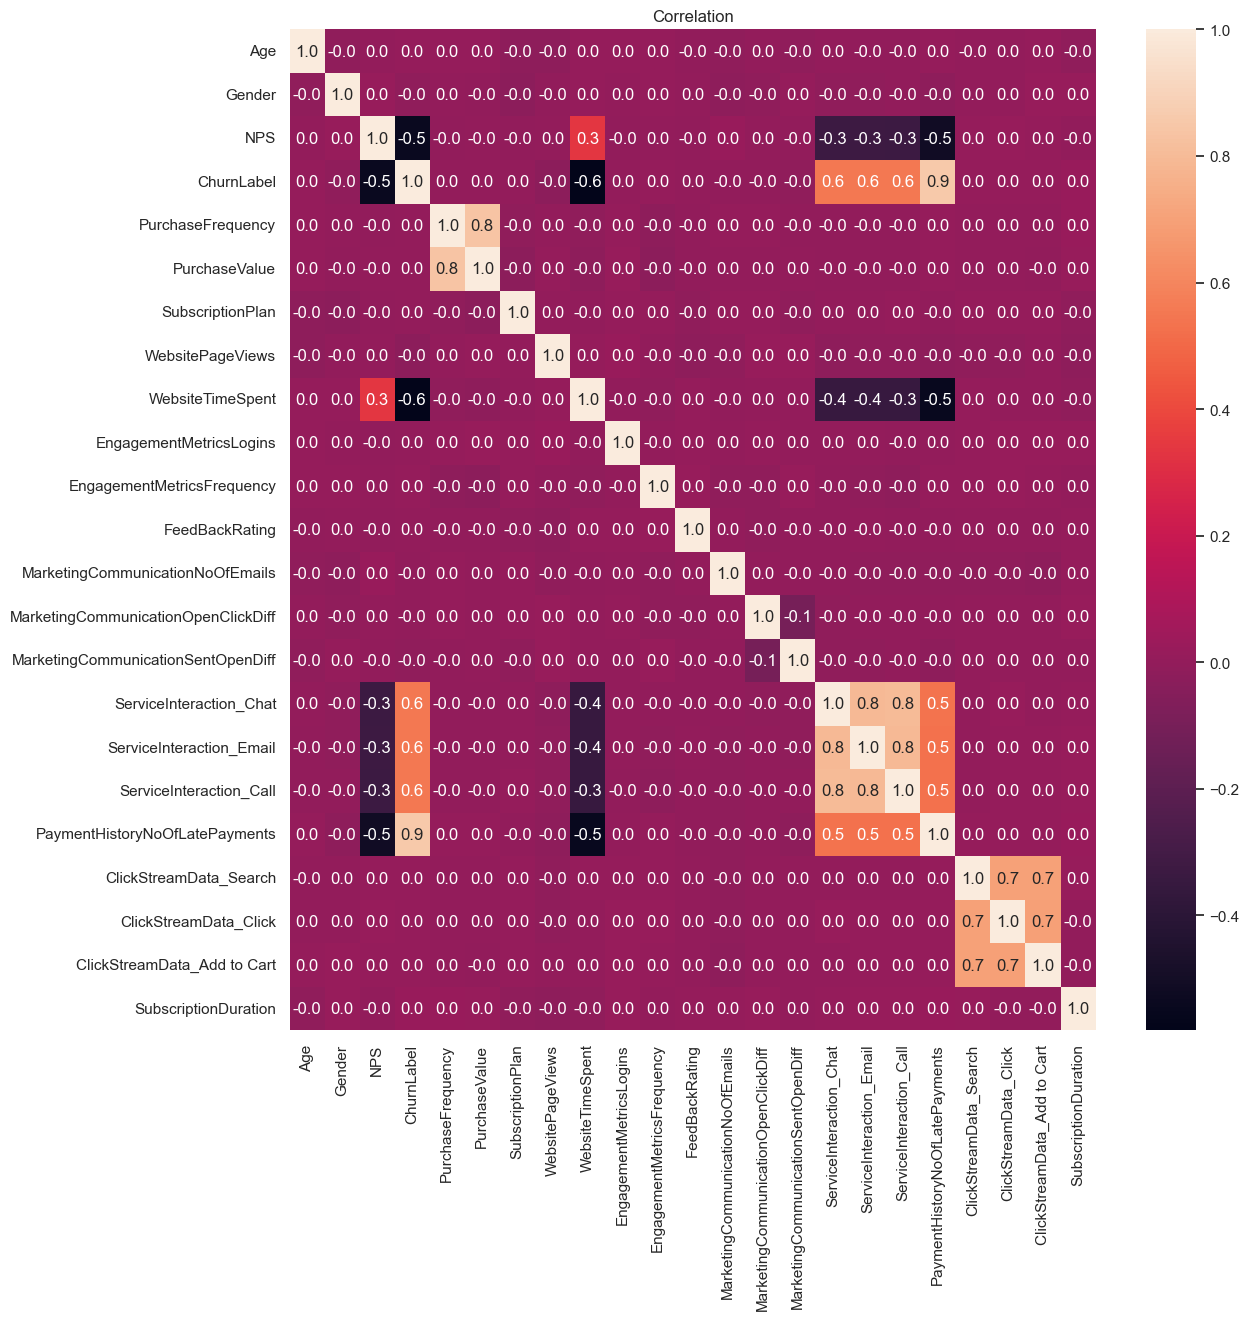

In [52]:
data_corr = data_.corr()

fig,ax = plt.subplots(figsize=(13,13))
sns.heatmap(data_corr,annot=True,fmt='.1f',ax=ax)
plt.title('Correlation')
plt.show()

# split data into train and validation set

In [53]:
X = data_.drop(columns=['ChurnLabel'])
y = data_['ChurnLabel']

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.3,random_state=42)

In [56]:
ss= StandardScaler()

X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

# Modelling
two different models for modelling
1. LogisticRegression
2. DecisionTreeClassifier

Metrics

1. Accuracy score
2. precision score
3. recall score
4. f1_score

In [61]:
# function to evaluate our model performance

def evaluate(X,y,model,subset=''):
    y_pred = model.predict(X)
    
    print(f'{subset} Accuracy Score: {accuracy_score(y,y_pred)}')
    print(f'{subset} Precision Score: {precision_score(y,y_pred)}')
    print(f'{subset} Recall Score: {recall_score(y,y_pred)}')
    print(f'{subset} f1_Score: {f1_score(y,y_pred)}\n')

In [62]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

evaluate(X_train,y_train,lr,'Training')
evaluate(X_val,y_val,lr,'Validation')

Training Accuracy Score: 0.9723557692307693
Training Precision Score: 0.9751004016064257
Training Recall Score: 0.9696485623003195
Training f1_Score: 0.9723668402082499

Validation Accuracy Score: 0.968968968968969
Validation Precision Score: 0.9762845849802372
Validation Recall Score: 0.9629629629629629
Validation f1_Score: 0.9695780176643769



# modelling with decsision tree

In [64]:
dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train,y_train)

evaluate(X_train,y_train,dt,'Training')
evaluate(X_val,y_val,dt,'Validation')

Training Accuracy Score: 0.9811698717948718
Training Precision Score: 0.979315831344471
Training Recall Score: 0.9832268370607029
Training f1_Score: 0.9812674372259865

Validation Accuracy Score: 0.9733066399733067
Validation Precision Score: 0.9733939000648929
Validation Recall Score: 0.9746588693957114
Validation f1_Score: 0.9740259740259741



### Evaluation on the test set

In [65]:
evaluate(X_test,y_test,lr,'Logistic regression')

evaluate(X_test,y_test,dt,'Decision tree')

Logistic regression Accuracy Score: 0.9676680972818312
Logistic regression Precision Score: 0.9754831266224402
Logistic regression Recall Score: 0.9599772920806131
Logistic regression f1_Score: 0.9676680972818312

Decision tree Accuracy Score: 0.9701001430615165
Decision tree Precision Score: 0.9704713231118682
Decision tree Recall Score: 0.9701958558047119
Decision tree f1_Score: 0.970333569907736



### Confusion Matrix

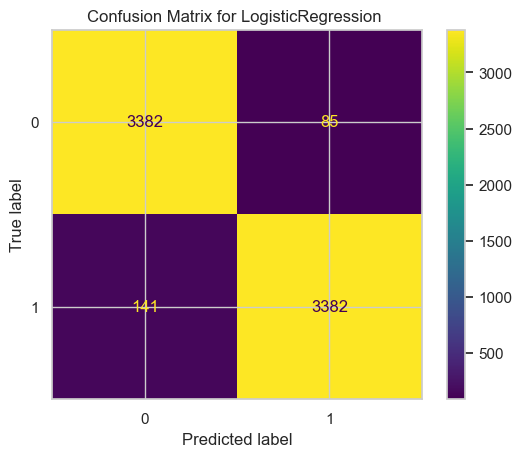

In [66]:
lr_y_pred = lr.predict(X_test)
lr_confusion_matrix = confusion_matrix(y_test,lr_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=lr_confusion_matrix)
display.plot()
plt.title("Confusion Matrix for LogisticRegression ")
plt.show()

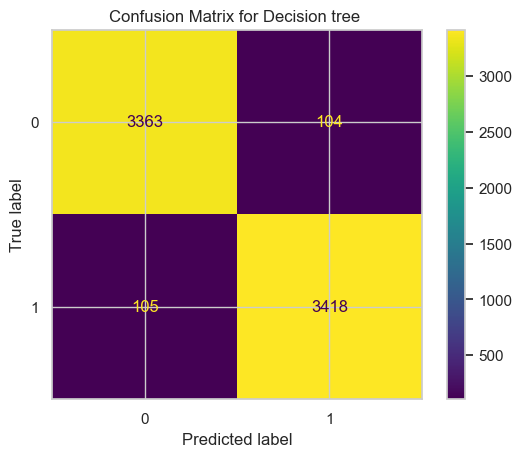

In [67]:
dt_y_pred = dt.predict(X_test)
dt_confusion_matrix = confusion_matrix(y_test,dt_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix)
display.plot()
plt.title("Confusion Matrix for Decision tree ")
plt.show()

# Conclusion
1. the most important features:
- the number of service interaction the customer had through email,chat,call
- the number of time the customer made late payment
- the time spent on the company's website
- the net promoter score(NPS)